# Independent two-sample t-test
> Equal sample sizes, equal variance

In [13]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

## Calculate the pooled standard deviation for N = n1 = n2 
#Calculate the unbiased estimators of the variances of the two samples to get the pooled standard deviation 

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

#Degrees of freedom (nx + ny)-2
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

# For a two tail t-test multiply the p value by 2
p = 2*p

print("t = " + str(t))
print("p = " + str(p))

'''You can see that after comparing the t statistic with the critical t value (computed internally) \
we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean \
of the two distributions are different and statistically significant.''' 


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))


t = 3.14243299796
p = 0.00563099362475
t = 3.14243299796
p = 0.0112619872495


## Can use scipy special function stdtr to Student t distribution cumulative density function

In [6]:
stats.t.cdf(t, 18)

0.99999117872215737

In [10]:
from scipy.special import stdtr
stdtr(df, t)

0.99999117872215737

# One-sample t-test

In [79]:
## Import the packages
import numpy as np
from scipy import stats
from scipy.stats import norm

np.random.seed(1234)
#sample
N = 5000

#degree of freedom
dof = N-1

#population mean
mu = 3
stdev = 0.3

#d = np.random.randn(N) + mu

## Define a normal random distribution
# for the standard normal distribution the location is the mean and the scale is the standard deviation.

pop = norm.stats(loc=mu, scale=stdev, moments="mv")

#sample
x = norm.rvs(mu, size = N)  #### it is importance to pass loc arg to the random variate gen step else the default\
                               ### loc = 0 will be used to generate the sample 

# Sample mean
xbar = x.mean()

# Sample std dev
xsd = x.std()

# t-test
ttest = (xbar - mu)/(xsd/(np.sqrt(N)))

# p-value using (stats.t.sf) a survival function
pval = stats.t.sf(np.abs(ttest), dof) *2         ###### x2 for two-tail t-test

print('t-statistic = %6.3f pvalue = %6.4f' % (ttest, pval))

t-statistic =  1.731 pvalue = 0.0835


In [80]:
stats.normaltest(x)

NormaltestResult(statistic=2.1397924658622252, pvalue=0.34304411225391662)

In [81]:
stats.kurtosistest(x), stats.skewtest(x)

(KurtosistestResult(statistic=-1.0079521084520224, pvalue=0.31347745408243732),
 SkewtestResult(statistic=-1.0601061328609263, pvalue=0.28909631803807034))

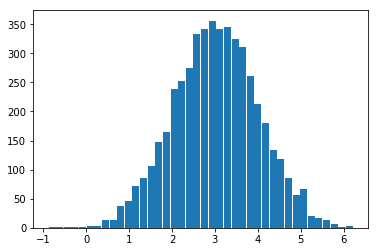

In [82]:
import matplotlib.pyplot as plt
plt.hist(x, bins= 40, rwidth = .92)
plt.show()

# Verify one sample t-test using built in scipy function

In [85]:
t3, p3 = stats.ttest_1samp(x, mu)
print("t = " + str(t3))
print("p = " + str(p3))

t = 1.73073026615
p = 0.0835615923199


## Comments for one sided t-test and p-value



    because the one-sided tests can be backed out from the two-sided tests. (With symmetric distributions one-sided p-value is just half of the two-sided pvalue)

It goes on to say that scipy always gives the test statistic as signed. This means that given p and t values from a two-tailed test, you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test when p/2 < alpha and t < 0.